**Connect the Drive**

In [ ]:
# Import necessary libraries
from google.colab import drive
# Mount Google Drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


**Import** the Libraries that you will need

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string
import ast
from sklearn.preprocessing import MultiLabelBinarizer

Upload the Cornel Movie Dataset as Lines, Conversations, Characters and Titles

In [ ]:
lines = pd.read_csv(
    "/content/MyDrive/MyDrive/NLP_Project/movie_lines.tsv.txt",
    encoding='utf-8-sig',
    sep='\t',
    on_bad_lines="skip",
    header = None,
    names = ['lineID', 'charID', 'movieID', 'charName', 'text'],
    index_col=['lineID']
)

In [ ]:
conversations = pd.read_csv(
    "/content/MyDrive/MyDrive/NLP_Project/movie_conversations.tsv.txt",
    sep='\t',
    encoding='ISO-8859-2',
    names = ['charID_1', 'charID_2', 'movieID', 'conversation']
)

In [ ]:
characters = pd.read_csv(
    "/content/MyDrive/MyDrive/NLP_Project/movie_characters_metadata.tsv",
    sep='\t',
    header = None,
    on_bad_lines= "skip",
    names = ['charID','charName','movieID','movieName','gender','score'],
    index_col=['charID']
)

In [ ]:
titles = pd.read_csv(
    "/content/MyDrive/MyDrive/NLP_Project/movie_titles_metadata.tsv",
    sep='\t',
    header=None,
    on_bad_lines="skip",
    names=['movieID', 'title', 'year', 'ratingIMDB', 'votes', 'genresIMDB'],
    index_col=['movieID']
)

**The Natural Language Tool Kit** (NLTK) is a powerful library in python used for working with human language data(text). It provides a suite of calssification, text processing, parsing, tokenising and semantic reasoning.

In [ ]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Preliminary Analysis of the Dataset.
Check the coloumns whether information exist or null.

In [ ]:
def check_columns_existence(df, columns):
    for col in columns:
        if col not in df.columns:
            print(f"The column '{col}' does not exist in DataFrame")
        else:
            print(f"The column '{col}' exists in DataFrame")

# Check if columns exist in each DataFrame
check_columns_existence(characters, ['charName'])
check_columns_existence(titles, ['title'])
check_columns_existence(lines, ['charName', 'text'])
check_columns_existence(conversations, ['charID_1', 'charID_2', 'movieID', 'conversation'])

The column 'charName' exists in DataFrame
The column 'title' exists in DataFrame
The column 'charName' exists in DataFrame
The column 'text' exists in DataFrame
The column 'charID_1' exists in DataFrame
The column 'charID_2' exists in DataFrame
The column 'movieID' exists in DataFrame
The column 'conversation' exists in DataFrame


Extract some data using info() which provides detailed information of the structure.

In [ ]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, m0 to m616
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       616 non-null    object 
 1   year        616 non-null    object 
 2   ratingIMDB  616 non-null    float64
 3   votes       616 non-null    float64
 4   genresIMDB  616 non-null    object 
dtypes: float64(2), object(3)
memory usage: 28.9+ KB


Inspect the first few rows using head()

In [ ]:
titles.head()

title  year  ratingIMDB     votes  \
movieID                                                           
m0       10 things i hate about you  1999         6.9   62847.0   
m1       1492: conquest of paradise  1992         6.2   10421.0   
m2                       15 minutes  2001         6.1   25854.0   
m3            2001: a space odyssey  1968         8.4  163227.0   
m4                          48 hrs.  1982         6.9   22289.0   

                                             genresIMDB  
movieID                                                  
m0                                 ['comedy' 'romance']  
m1          ['adventure' 'biography' 'drama' 'history']  
m2                ['action' 'crime' 'drama' 'thriller']  
m3                     ['adventure' 'mystery' 'sci-fi']  
m4       ['action' 'comedy' 'crime' 'drama' 'thriller']

It is possible that some columns might be empty. Let's find out by using isnull()

In [ ]:
# Check for missing values
print(titles.isnull().sum())

title         1
year          1
ratingIMDB    1
votes         1
genresIMDB    1
dtype: int64


Create a Histogram of the Votes Distribution

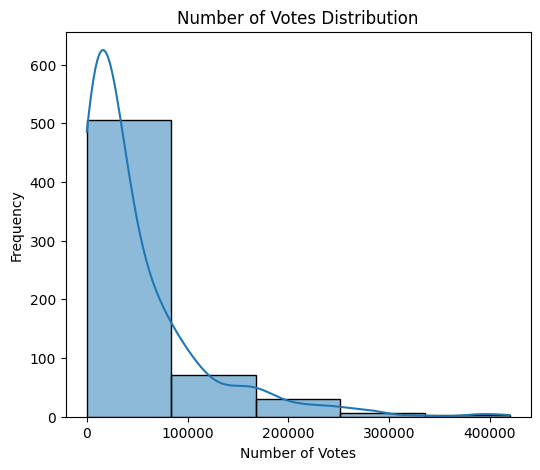

In [ ]:
# Number of Votes Distribution
plt.figure(figsize=(6, 5))
sns.histplot(titles['votes'], bins=5, kde=True)
plt.title('Number of Votes Distribution')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

Add Ratings as a List

In [ ]:
ratings_list = titles['ratingIMDB'].tolist()
print(ratings_list)

[6.9, 6.2, 6.1, 8.4, 6.9, 7.5, 6.3, 5.2, 4.7, 4.9, 6.9, 6.3, 5.8, 7.8, 6.1, 8.5, 8.4, 7.5, 7.4, 5.7, 7.4, 6.0, 7.1, 3.4, 5.9, 6.6, 6.9, 6.3, 8.1, 6.3, 8.1, 6.0, 7.1, 6.4, 8.3, 6.4, 7.8, 7.8, 7.2, 7.6, 8.4, 7.8, 8.8, 7.5, 7.5, 6.8, 7.2, 6.5, 5.3, 6.5, 8.3, 6.3, 8.1, 8.4, 5.9, 8.5, 4.0, 6.4, 5.7, 7.2, 7.6, 6.4, 7.2, 8.0, 5.6, 7.1, 5.6, 4.9, 7.2, 7.5, 6.9, 5.3, 7.7, 6.6, 6.1, 6.9, 8.4, 8.2, 7.7, 7.0, 5.4, 4.5, 5.8, 6.7, 8.1, 6.2, 6.8, 7.0, 7.6, 7.2, 8.1, 7.4, 5.6, 6.3, 8.2, 7.1, 6.4, 6.6, 8.3, 7.5, 6.5, 8.0, 6.4, 8.3, 8.0, 7.6, 7.5, 4.4, 8.3, 7.9, 6.7, 6.8, 5.8, 5.9, 8.6, 4.5, 7.6, 6.2, 6.2, 7.5, 7.3, 5.0, 6.7, 7.6, 7.8, 7.0, 7.7, 6.4, 7.7, 7.7, 7.7, 7.8, 7.7, 5.3, 8.4, 8.2, 5.5, 4.5, 6.7, 8.4, 8.0, 6.8, 6.9, 5.9, 5.5, 5.4, 6.2, 8.2, 7.4, 7.9, 7.1, 8.3, 6.4, 7.8, 6.8, 6.9, 5.9, 6.9, 6.3, 7.2, 6.7, 6.9, 7.5, 7.4, 7.3, 7.1, 8.4, 8.7, 7.9, 5.5, 8.4, 6.9, 4.7, 6.4, 6.9, 7.1, 6.5, 5.4, 7.8, 6.9, 7.0, 8.3, 8.2, 4.2, 6.6, 6.6, 6.6, 6.2, 6.1, 7.4, 8.2, 6.5, 6.5, 7.8, 7.3, 6.3, 7.6, 7.2, 6.4, 6.9,

Find out the ratings of the movies

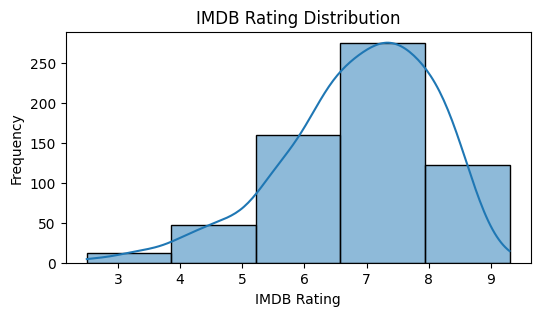

In [ ]:
# IMDB Rating Distribution
plt.figure(figsize=(6, 3))
sns.histplot(titles['ratingIMDB'], bins=5, kde=True)
plt.title('IMDB Rating Distribution')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()

Let's Group the ratings

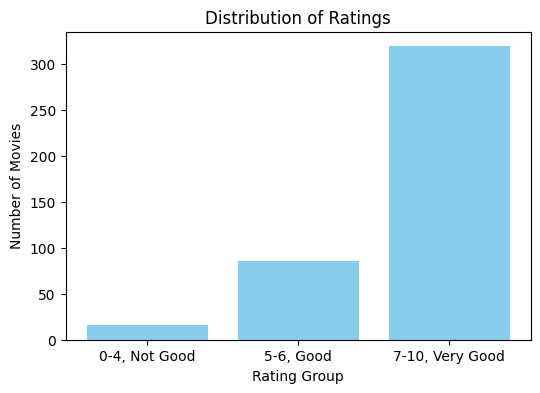

In [ ]:
# Categorize ratings into 3 groups (0-4, 5-6, 7-10)
rating_groups = {
    '0-4, Not Good': sum(1 for rating in ratings_list if rating <= 4),
    '5-6, Good': sum(1 for rating in ratings_list if 5 <= rating <= 6),
    '7-10, Very Good': sum(1 for rating in ratings_list if rating >= 7)
}

# Plotting the data
plt.figure(figsize=(6, 4))
plt.bar(rating_groups.keys(), rating_groups.values(), color='skyblue')
plt.xlabel('Rating Group')
plt.ylabel('Number of Movies')
plt.title('Distribution of Ratings')
plt.show()

Plot the ratings as Pie chart

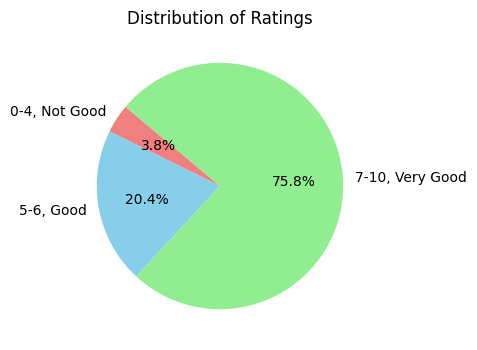

In [ ]:
# Plotting the data
plt.figure(figsize=(6, 4))
plt.pie(rating_groups.values(), labels=rating_groups.keys(), autopct='%1.1f%%', startangle=140, colors=['lightcoral','skyblue', 'lightgreen'])
plt.title('Distribution of Ratings')
plt.show()

Find out the rating of a particular movie

In [ ]:
def search_movie_rating(title):
    # Search for the movie by title and get its rating
    movie_rating = titles.loc[titles['title'].str.contains(title, case=False, na=False), 'ratingIMDB']

    if not movie_rating.empty:
        return movie_rating.values[0]
    else:
        return "Movie not found or no rating available."

# Example usage:
#movie_to_search = input("Enter the title of the movie to search for: ")
movie_to_search= '48 hrs.'
rating = search_movie_rating(movie_to_search)
print(f"The rating for '{movie_to_search}' is: {rating}")

The rating for '48 hrs.' is: 6.9


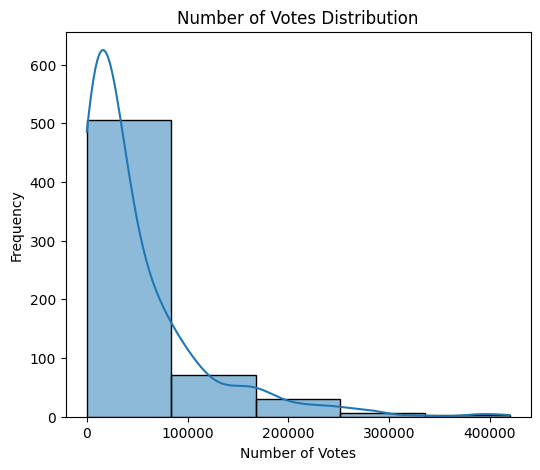

In [ ]:
# Number of Votes Distribution
plt.figure(figsize=(6, 5))
sns.histplot(titles['votes'], bins=5, kde=True)
plt.title('Number of Votes Distribution')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

Comparision of IMDB ratings and Votes using Scatter Plot

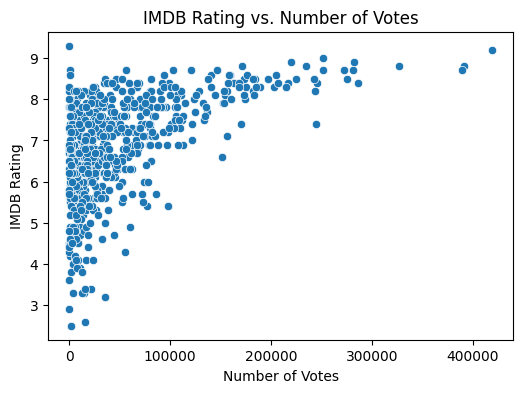

In [ ]:
# IMDB Rating vs. Number of Votes
plt.figure(figsize=(6, 4))
sns.scatterplot(x='votes', y='ratingIMDB', data=titles)
plt.title('IMDB Rating vs. Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('IMDB Rating')
plt.show()

3D-Plotting as per Year,IMDB rating and Votes

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Clean the "year" column
titles['year'] = titles['year'].str.extract(r'(\d+)').astype(float)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(titles['year'], titles['ratingIMDB'], titles['votes'], c='b', marker='o')

# Customize labels and title
ax.set_xlabel('Year')
ax.set_ylabel('IMDB Rating')
ax.set_zlabel('Votes')
ax.set_title('3D Scatter Plot of Movies')

# Show plot
plt.show()

AttributeError: Can only use .str accessor with string values!

Check the list of genres present in the dataset. By representing as a list we can easily access and manipulate the information associated in single tile.

In [ ]:
def get_genre_list(genres):
    genre_list = genres['genresIMDB'].tolist()
    return genre_list

In [ ]:
genre_list = get_genre_list(titles)
print(genre_list[:10])

["['comedy' 'romance']", "['adventure' 'biography' 'drama' 'history']", "['action' 'crime' 'drama' 'thriller']", "['adventure' 'mystery' 'sci-fi']", "['action' 'comedy' 'crime' 'drama' 'thriller']", "['action' 'adventure' 'romance' 'sci-fi' 'thriller']", "['crime' 'mystery' 'thriller']", "['fantasy' 'horror' 'thriller']", "['fantasy' 'horror' 'thriller']", "['sci-fi' 'thriller']"]


In [ ]:
type(genre_list)

list

Splitting the genres as most of the movies have more than one genre.

In [ ]:
# Initialize an empty list to store all genres
all_genres = []

# Loop through each nested list and extract genres
for genres in genre_list:
    if isinstance(genres, str):
        # Remove the brackets and split the string into individual genres
        cleaned_genres = genres.strip("[]").replace("'", "").split()
        # Extend the all_genres list with the cleaned genres
        all_genres.extend(cleaned_genres)

# Convert the list to a set to remove duplicates and then back to a sorted list
unique_genres_list = sorted(set(all_genres))

# Display the unique genres
print(unique_genres_list)

['action', 'adult', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'film-noir', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sci-fi', 'short', 'sport', 'thriller', 'war', 'western']


Use len() to find the length of genres list

In [ ]:
len(all_genres)

1868

Let's find out which genres are present in the list.

In [ ]:
print(all_genres)

['comedy', 'romance', 'adventure', 'biography', 'drama', 'history', 'action', 'crime', 'drama', 'thriller', 'adventure', 'mystery', 'sci-fi', 'action', 'comedy', 'crime', 'drama', 'thriller', 'action', 'adventure', 'romance', 'sci-fi', 'thriller', 'crime', 'mystery', 'thriller', 'fantasy', 'horror', 'thriller', 'fantasy', 'horror', 'thriller', 'sci-fi', 'thriller', 'drama', 'mystery', 'thriller', 'action', 'drama', 'thriller', 'comedy', 'romance', 'sci-fi', 'comedy', 'romance', 'crime', 'drama', 'sci-fi', 'thriller', 'action', 'sci-fi', 'thriller', 'biography', 'drama', 'music', 'horror', 'romance', 'drama', 'action', 'western', 'drama', 'thriller', 'drama', 'thriller', 'action', 'adventure', 'comedy', 'crime', 'action', 'adventure', 'thriller', 'comedy', 'romance', 'action', 'crime', 'drama', 'mystery', 'thriller', 'crime', 'drama', 'comedy', 'drama', 'music', 'drama', 'romance', 'war', 'crime', 'drama', 'mystery', 'thriller', 'adventure', 'drama', 'fantasy', 'comedy', 'crime', 'roman

In [ ]:
len(unique_genres_list)

24

Which genre is more frequent in our dataset ?

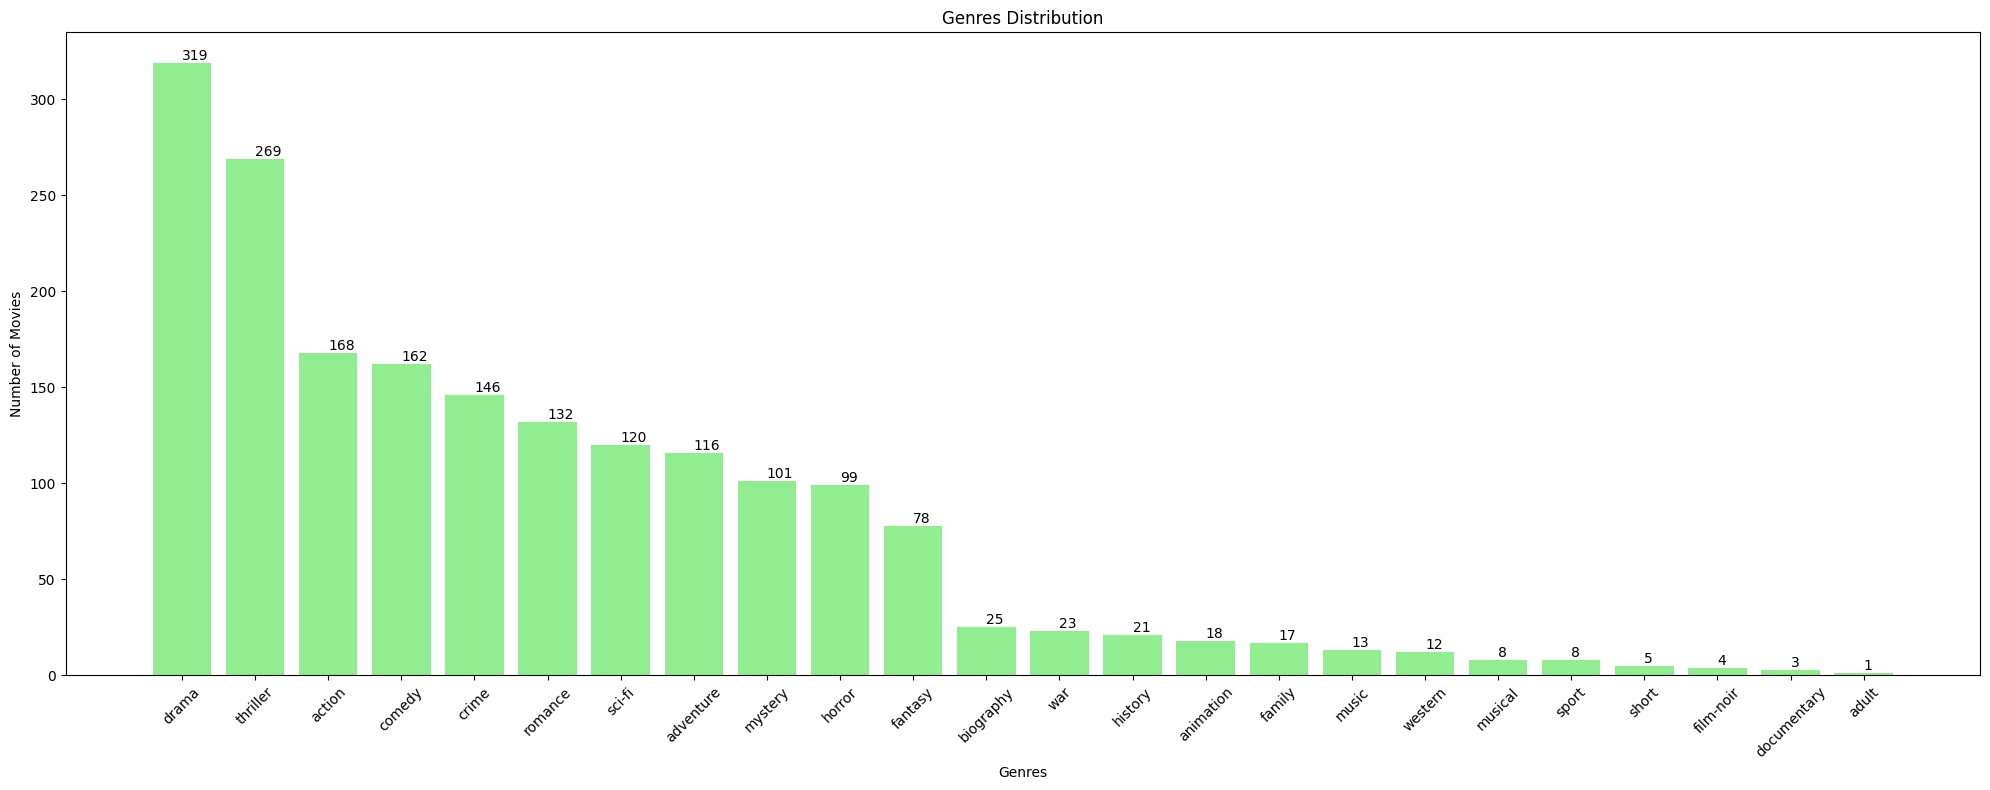

In [ ]:
# Count the frequency of each word
word_counts = {}
for word in all_genres:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Create a DataFrame from the word counts
df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency
df = df.sort_values(by='Frequency', ascending=False)

# Plotting the data
plt.figure(figsize=(20, 8))
bars = plt.bar(df['Word'], df['Frequency'], color='lightgreen')
plt.bar(df['Word'], df['Frequency'], color='lightgreen')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Genres Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add text labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()

Plot the ratings of genres

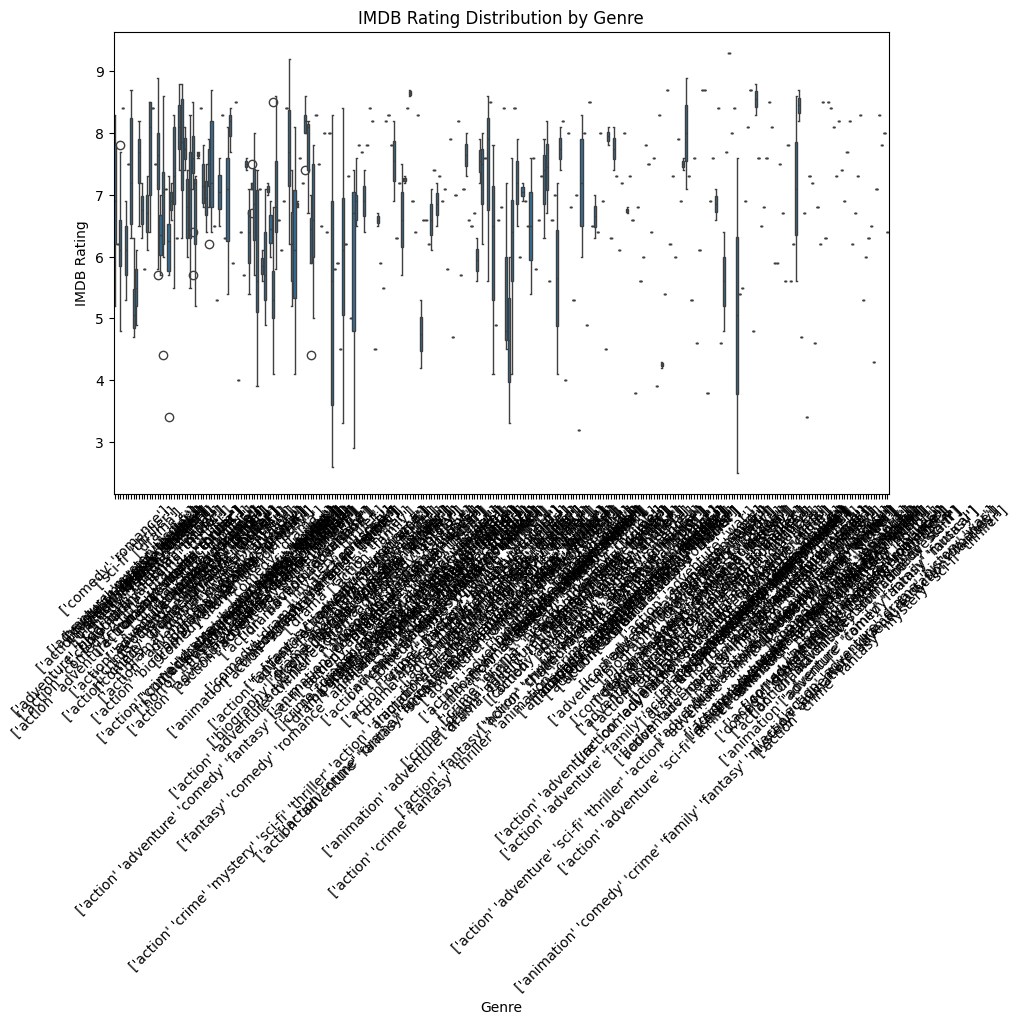

In [ ]:
# Explode genres list to separate rows
genres_exploded = titles.explode('genresIMDB')

# IMDB Rating Distribution by Genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='genresIMDB', y='ratingIMDB', data=genres_exploded)
plt.title('IMDB Rating Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=45)
plt.show()

Find out the genre of movie "48hrs"

In [ ]:
df= titles
def find_genres(keyword):
    # Search for the keyword in the movie titles (case insensitive)
    matching_movies = df[df['title'].str.contains(keyword, case=False, na=False)]

    if not matching_movies.empty:
        # If there's a match, return the movie title and genres as a list of tuples
        x = [(row['title'], row['genresIMDB']) for index, row in matching_movies.iterrows()]
        # Convert list to dictionary
        result_dict = {key: [genre.strip("'") for genre in value.strip("[]").split(", ")] for key, value in x}
        # Convert dictionary to string
        os = f"Movie: {list(result_dict.keys())[0]}\nGenres = {result_dict[list(result_dict.keys())[0]]}"
        return os
    else:
        return "No matching movie found."

#movie_name = input("Enter the title of the movie to search genre: ")
movie_name= '48 hrs.'
genres = find_genres(movie_name)
print(genres)

Movie: 48 hrs.
Genres = ["action' 'comedy' 'crime' 'drama' 'thriller"]


In [ ]:
titles.head()

title    year  ratingIMDB     votes  \
movieID                                                             
m0       10 things i hate about you  1999.0         6.9   62847.0   
m1       1492: conquest of paradise  1992.0         6.2   10421.0   
m2                       15 minutes  2001.0         6.1   25854.0   
m3            2001: a space odyssey  1968.0         8.4  163227.0   
m4                          48 hrs.  1982.0         6.9   22289.0   

                                             genresIMDB  
movieID                                                  
m0                                 ['comedy' 'romance']  
m1          ['adventure' 'biography' 'drama' 'history']  
m2                ['action' 'crime' 'drama' 'thriller']  
m3                     ['adventure' 'mystery' 'sci-fi']  
m4       ['action' 'comedy' 'crime' 'drama' 'thriller']

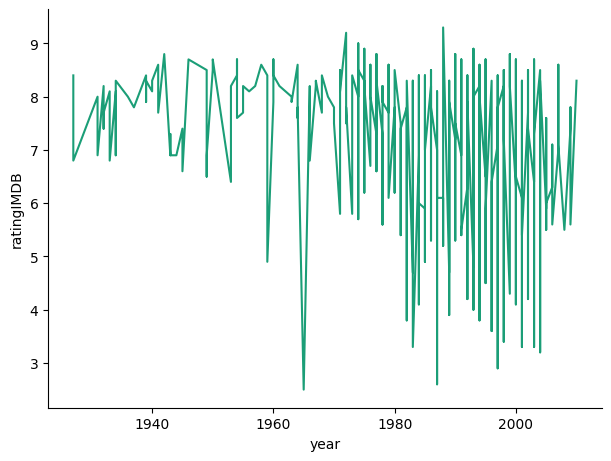

In [ ]:
# @title year vs ratingIMDB

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['ratingIMDB']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(6, 4.5), layout='constrained')
df_sorted = titles.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('ratingIMDB')

We are interested in Action movies so, let's see which action movies we can find from the dataset.

In [ ]:
def find_movies_by_genre(dataframe, genre):
    # Create a copy of the dataframe to avoid modifying the original
    dataframe_copy = dataframe.copy()

    # Replace NaN values with an empty list in the 'genresIMDB' column in the copy
    dataframe_copy['genresIMDB'].fillna('[]', inplace=True)

    # Convert the genre column to a list of strings in the copy
    dataframe_copy['genresIMDB'] = dataframe_copy['genresIMDB'].apply(ast.literal_eval)

    # Convert genre to lowercase for case-insensitive matching
    genre_lower = genre.lower()

    # Filter the copy of the dataframe to find movies with the specified genre
    filtered_movies = dataframe_copy[dataframe_copy['genresIMDB'].apply(lambda x: any(genre_lower in g.lower() for g in x))]

    return filtered_movies[['title', 'year', 'ratingIMDB']]

genre_to_search = 'action'
#genre_to_searc = input("Enter the genre to search genre: ")
movies_with_genre = find_movies_by_genre(titles, genre_to_search)
print(f"Movies with genre '{genre_to_search}':")
print(movies_with_genre[:10])

Movies with genre 'action':
                                               title    year  ratingIMDB
movieID                                                                 
m2                                        15 minutes  2001.0         6.1
m4                                           48 hrs.  1982.0         6.9
m5                                 the fifth element  1997.0         7.5
m11                                    air force one  1997.0         6.3
m15                                           aliens  1986.0         8.5
m19                                 american outlaws  2001.0         5.7
m22      austin powers: international man of mystery  1997.0         7.1
m23                                     the avengers  1998.0         3.4
m25                                        backdraft  1991.0         6.6
m33                                       black rain  1989.0         6.4


# How about Horror movies ?

In [ ]:
def find_movies_by_genre(dataframe, genre):
    # Create a copy of the dataframe to avoid modifying the original
    dataframe_copy = dataframe.copy()

    # Replace NaN values with an empty list in the 'genresIMDB' column in the copy
    dataframe_copy['genresIMDB'].fillna('[]', inplace=True)

    # Convert the genre column to a list of strings in the copy
    dataframe_copy['genresIMDB'] = dataframe_copy['genresIMDB'].apply(ast.literal_eval)

    # Convert genre to lowercase for case-insensitive matching
    genre_lower = genre.lower()

    # Filter the copy of the dataframe to find movies with the specified genre
    filtered_movies = dataframe_copy[dataframe_copy['genresIMDB'].apply(lambda x: any(genre_lower in g.lower() for g in x))]

    return filtered_movies[['title', 'year', 'ratingIMDB']]

genre_to_search = 'horror'
#genre_to_searc = input("Enter the genre to search genre: ")
movies_with_genre = find_movies_by_genre(titles, genre_to_search)
print(f"Movies with genre '{genre_to_search}':")
print(movies_with_genre[:10])

Movies with genre 'horror':
                                                 title    year  ratingIMDB
movieID                                                                   
m7       a nightmare on elm street 4: the dream master  1988.0         5.2
m8          a nightmare on elm street: the dream child  1989.0         4.7
m17                     an american werewolf in london  1981.0         7.5
m48                                         dark angel  1990.0         5.3
m57                                      event horizon  1997.0         6.4
m61                                              feast  2005.0         6.4
m63                                       frankenstein  1931.0         8.0
m64                                    friday the 13th  2009.0         5.6
m65                                from dusk till dawn  1996.0         7.1
m67                                           godzilla  1998.0         4.9


#A Sneak Peak into the movies present in our dataset
Wordcloud is used to visualize the text data as a collection where the size indicates the frequency or importance within the text.

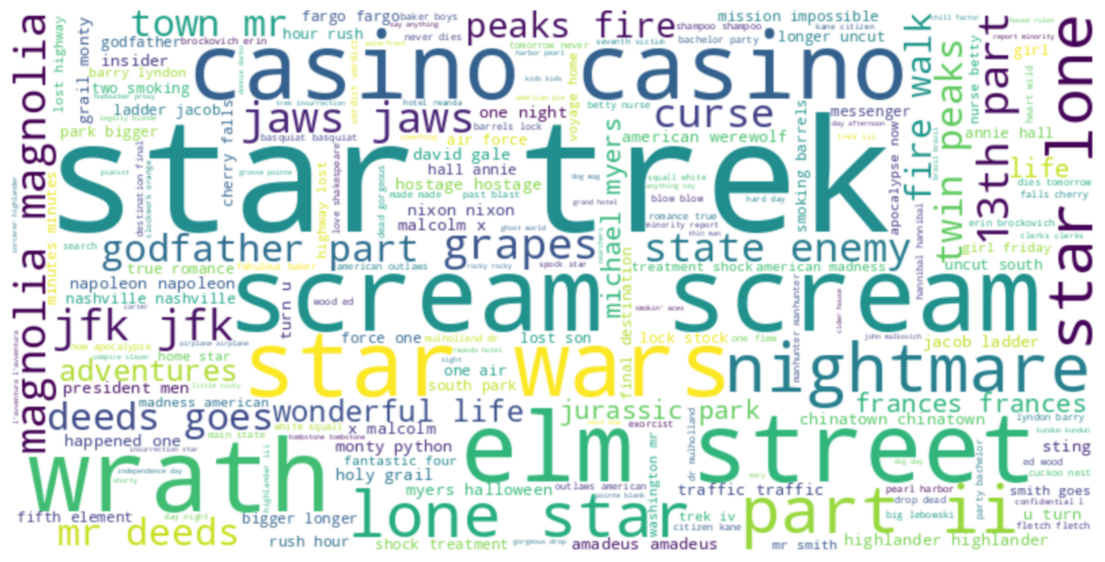

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Convert the "title" column to string type
characters['movieName'] = characters['movieName'].astype(str)

# Extract the "title" column
mvs = characters['movieName']

# Concatenate all titles into a single string
text = ' '.join(mvs)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.show()

# List of characters

In [ ]:
characters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9034 entries, u0 to u9034
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   charName   9015 non-null   object
 1   movieID    9017 non-null   object
 2   movieName  9034 non-null   object
 3   gender     9017 non-null   object
 4   score      9017 non-null   object
dtypes: object(5)
memory usage: 423.5+ KB


Some details of the character dataset

In [ ]:
characters.head()

charName movieID                   movieName gender score
charID                                                           
u0        BIANCA      m0  10 things i hate about you      f     4
u1         BRUCE      m0  10 things i hate about you      ?     ?
u2       CAMERON      m0  10 things i hate about you      m     3
u3      CHASTITY      m0  10 things i hate about you      ?     ?
u4          JOEY      m0  10 things i hate about you      m     6

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('charName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('score').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['gender'].value_counts()
    for x_label, grp in _df_3.groupby('charName')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('charName')
_ = plt.ylabel('gender')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['score'].value_counts()
    for x_label, grp in _df_4.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('score')

<ipython-input-69-5ad4fd7d17ec>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(characters, x='score', y='gender', inner='box', palette='Dark2')


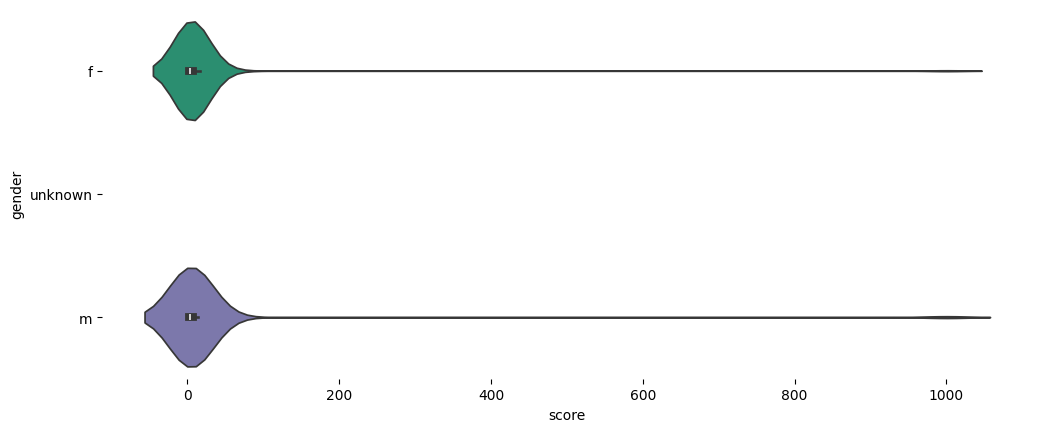

In [ ]:
#  gender vs score

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(characters['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(characters, x='score', y='gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

As we can see some values in the gender and score column are absent. We can replace them with NaN values

In [ ]:
characters['gender'].replace('?', 'unknown', inplace=True)
characters['score'] = pd.to_numeric(characters['score'], errors='coerce')

In [ ]:
print(characters['gender'].value_counts())

gender
unknown    6008
m          1899
f           921
M           145
F            44
Name: count, dtype: int64


Standardizing the representation by converting into lowercase for further modelling.

In [ ]:
# Data Cleaning
characters['gender'] = characters['gender'].str.lower().replace('?', 'unknown')
characters['score'] = pd.to_numeric(characters['score'], errors='coerce')

# Display cleaned data
print(characters)


             charName movieID                   movieName   gender  score
charID                                                                   
u0             BIANCA      m0  10 things i hate about you        f    4.0
u1              BRUCE      m0  10 things i hate about you  unknown    NaN
u2            CAMERON      m0  10 things i hate about you        m    3.0
u3           CHASTITY      m0  10 things i hate about you  unknown    NaN
u4               JOEY      m0  10 things i hate about you        m    6.0
...               ...     ...                         ...      ...    ...
u9030        DURNFORD    m616                   zulu dawn  unknown    NaN
u9031         MELVILL    m616                   zulu dawn  unknown    NaN
u9032   NORRIS-NEWMAN    m616                   zulu dawn  unknown    NaN
u9033    STUART SMITH    m616                   zulu dawn  unknown    NaN
u9034         VEREKER    m616                   zulu dawn  unknown    NaN

[9034 rows x 5 columns]


Frequency of each gender category.

In [ ]:
print(characters['gender'].value_counts())

gender
unknown    6008
m          2044
f           965
Name: count, dtype: int64


Plotting the gender distribution.

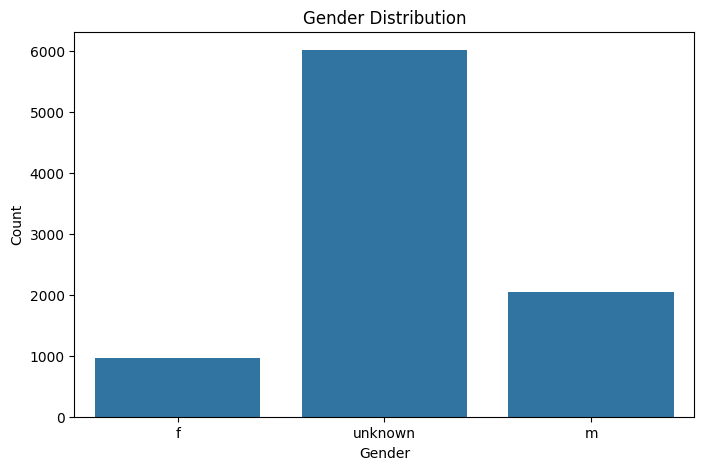

In [ ]:
# Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=characters)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Plot the score of characters

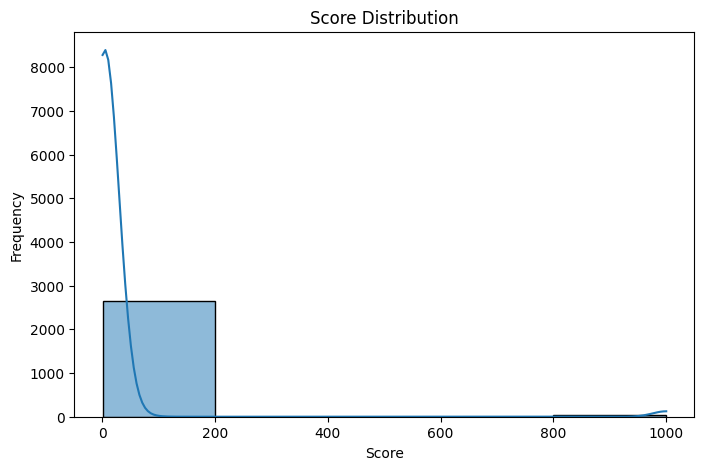

In [ ]:
# Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(characters['score'].dropna(), bins=5, kde=True)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


Plot the character score by gender

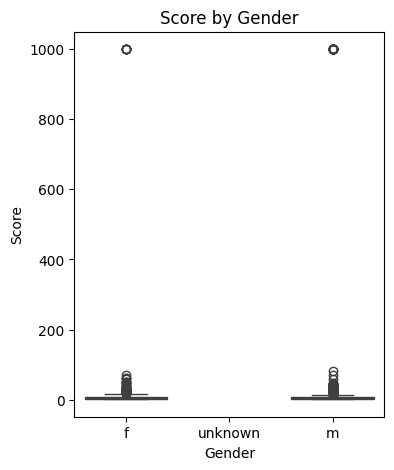

In [ ]:
# Score by Gender
plt.figure(figsize=(4, 5))
sns.boxplot(x='gender', y='score', data=characters)
plt.title('Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.show()

# Lines dataset
Let's have a look in the lines dataset which is a collection of dialogs of the movies.

In [ ]:
lines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293202 entries, L1045 to L666256
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   charID    288917 non-null  object
 1   movieID   288917 non-null  object
 2   charName  288874 non-null  object
 3   text      288663 non-null  object
dtypes: object(4)
memory usage: 11.2+ MB


#First 5 rows in the lines

In [ ]:
lines.head()

charID movieID charName          text
lineID                                      
L1045      u0      m0   BIANCA  They do not!
L1044      u2      m0  CAMERON   They do to!
L985       u0      m0   BIANCA    I hope so.
L984       u2      m0  CAMERON     She okay?
L925       u0      m0   BIANCA     Let's go.

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('lineID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('charID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('charName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['charID'].value_counts()
    for x_label, grp in _df_9.groupby('lineID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('lineID')
_ = plt.ylabel('charID')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['charName'].value_counts()
    for x_label, grp in _df_10.groupby('charID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('charID')
_ = plt.ylabel('charName')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_11.groupby('charName')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('charName')
_ = plt.ylabel('text')

#Textblob
Textblob is used for sentiment analysis as it is easy to use for common text processing

In [ ]:
!pip install textblob

#Preprocessing
This step ensures consistency and compatibility of the data for further analysis.

In [ ]:
# Convert NaNs to empty strings
lines['text'] = lines['text'].fillna('')

# Convert all values in the 'text' column to strings
lines['text'] = lines['text'].astype(str)


The code calculates two sentiment metrics:
Polarity: A numerical value indicating the positivity or negativity of the text (-1 being very negative, 1 being very positive). Subjectivity: A numerical value indicating how subjective or objective the text is (0 being very objective, 1 being very subjective)

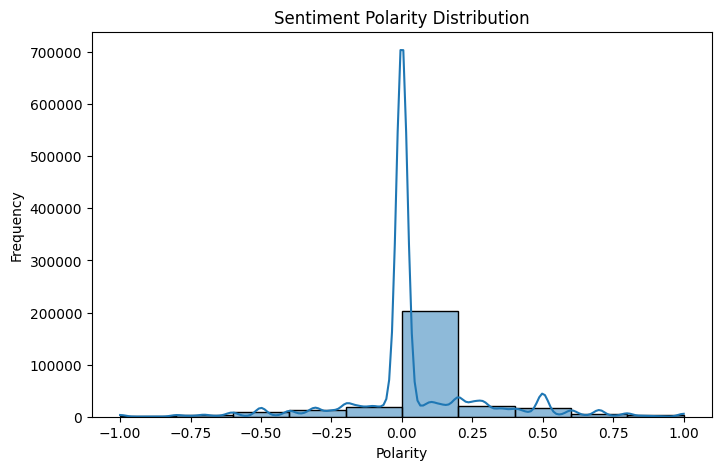

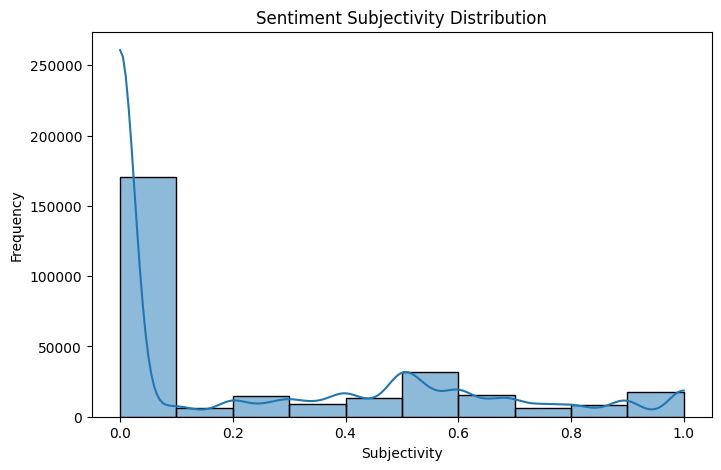

In [ ]:
from textblob import TextBlob

# Function to get the sentiment polarity and subjectivity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis
lines['polarity'], lines['subjectivity'] = zip(*lines['text'].apply(get_sentiment))

# Visualize sentiment polarity
plt.figure(figsize=(8, 5))
sns.histplot(lines['polarity'], bins=10, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Visualize sentiment subjectivity
plt.figure(figsize=(8, 5))
sns.histplot(lines['subjectivity'], bins=10, kde=True)
plt.title('Sentiment Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()


In [ ]:
lines.tail()

charID movieID  charName  \
lineID                             
L666371  u9030    m616  DURNFORD   
L666370  u9034    m616   VEREKER   
L666369  u9030    m616  DURNFORD   
L666257  u9030    m616  DURNFORD   
L666256  u9034    m616   VEREKER   

                                                      text  polarity  \
lineID                                                                 
L666371  Lord Chelmsford seems to want me to stay back ...  0.000000   
L666370  I'm to take the Sikali with the main column to...  0.166667   
L666369                            Your orders Mr Vereker?  0.000000   
L666257  Good ones yes Mr Vereker. Gentlemen who can ri...  0.700000   
L666256  Colonel Durnford... William Vereker. I hear yo...  0.000000   

         subjectivity  
lineID                 
L666371      0.000000  
L666370      0.333333  
L666369      0.000000  
L666257      0.600000  
L666256      0.000000

#WordCloud
Wordcloud is used to visualize the text data as a collection where the size indicates the frequency or importance within the text.

In [ ]:
!pip install wordcloud

Generating word clouds for characters like Bianca and Cameron can help visualize the most common words they use in their dialogue.

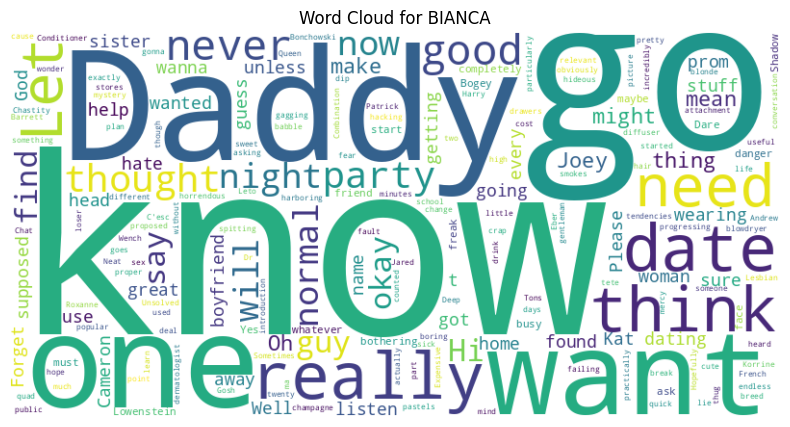

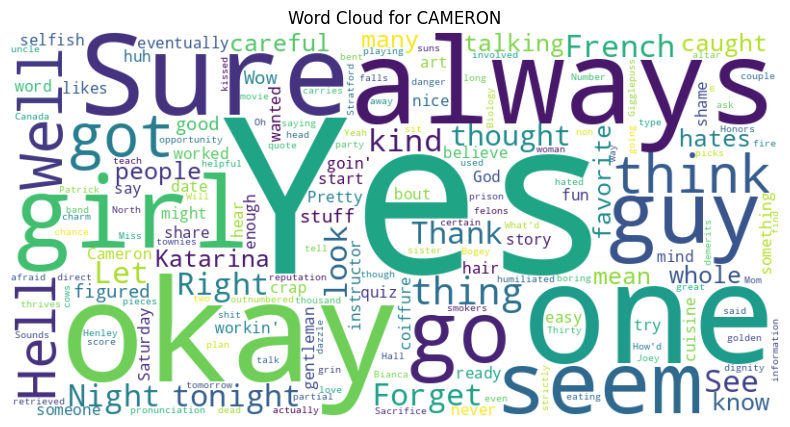

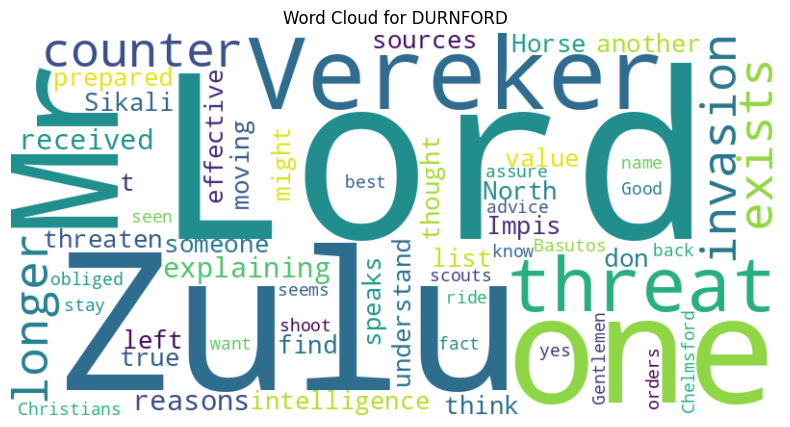

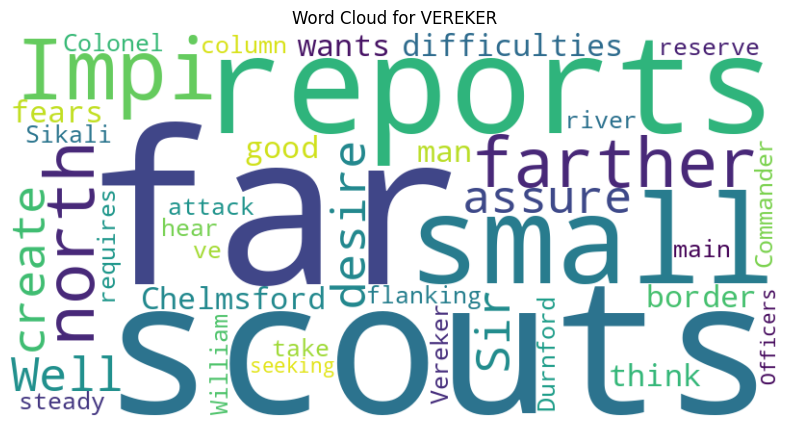

In [ ]:
from wordcloud import WordCloud

# Function to generate word cloud for a given character
def generate_wordcloud(character):
    text = ' '.join(lines[lines['charName'] == character]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {character}')
    plt.axis('off')
    plt.show()

# Generate word clouds for BIANCA and CAMERON
generate_wordcloud('BIANCA')
generate_wordcloud('CAMERON')
generate_wordcloud('DURNFORD')
generate_wordcloud('VEREKER')

#Text length
The distribution of text length provides insights into the typical length, variability, and speech patterns of dialogue lines spoken by characters in the dataset. It helps understand average dialogue length, variability in speech patterns, emotional intensity, engagement levels, and character communication styles. Visualizing this distribution allows for quick insights into the nature of the textual data.

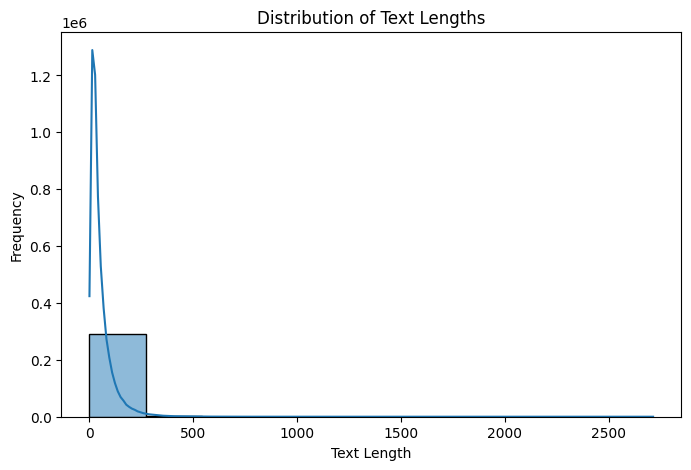

In [ ]:
# Add a column for text length
lines['text_length'] = lines['text'].apply(len)

# Distribution of text lengths
plt.figure(figsize=(8, 5))
sns.histplot(lines['text_length'], bins=10, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Conversations Dataset
Overlook on the Conversations dataset.

In [ ]:
conversations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83097 entries, 0 to 83096
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   charID_1      83097 non-null  object
 1   charID_2      83097 non-null  object
 2   movieID       83097 non-null  object
 3   conversation  83097 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


Head() shows the information of first 5 rows of the dataset.

In [ ]:
conversations.head()

charID_1 charID_2 movieID                   conversation
0       u0       u2      m0  ['L194' 'L195' 'L196' 'L197']
1       u0       u2      m0                ['L198' 'L199']
2       u0       u2      m0  ['L200' 'L201' 'L202' 'L203']
3       u0       u2      m0         ['L204' 'L205' 'L206']
4       u0       u2      m0                ['L207' 'L208']

In [ ]:
def get_movie_list(movies):
    movie_list = movies['title'].tolist()
    return movie_list

In [ ]:
movie_list = get_movie_list(titles)
print(movie_list[:10])

['10 things i hate about you', '1492: conquest of paradise', '15 minutes', '2001: a space odyssey', '48 hrs.', 'the fifth element', '8mm', 'a nightmare on elm street 4: the dream master', 'a nightmare on elm street: the dream child', 'the atomic submarine']


In [ ]:
len(movie_list)

617

The character column is converted into list by using tolist() for better accessing of the information.

In [ ]:
def get_chracter_list(character):
    character_list = character['charName'].tolist()
    return character_list

Here is the names list of characters.

In [ ]:
character_list = get_chracter_list(characters)
print(character_list[:10])

['BIANCA', 'BRUCE', 'CAMERON', 'CHASTITY', 'JOEY', 'KAT', 'MANDELLA', 'MICHAEL', 'MISS PERKY', 'PATRICK']


The total length of characters can be known by len().

In [ ]:
len(character_list)

9034

We are looking into the labels of titles dataset.

In [ ]:
index_labels = titles.index
print(index_labels)

Index(['m0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       ...
       'm607', 'm608', 'm609', 'm610', 'm611', 'm612', 'm613', 'm614', 'm615',
       'm616'],
      dtype='object', name='movieID', length=617)


#Extraction of Conversations
we are using indices of movie titles and movie ID to extract the conversations of characters.



In [96]:
def extract_conversations_for_movies(movies_list, characters, movies, lines, conversations):
    movie_ids = [movies[movies['title'] == movie_title].index[0] for movie_title in movies_list]
    movie_conversations = {}

    for movie_id in movie_ids:
        # Get all conversations for this movie
        relevant_convos = conversations[conversations['movieID'] == movie_id]

        # If the movie title isn't already in the dictionary, add it with an empty list
        movie_title = movies.loc[movie_id].title
        if movie_title not in movie_conversations:
            movie_conversations[movie_title] = []

        # Loop through the relevant conversations
        for i, conversation in relevant_convos.iterrows():
            char_name1 = characters.loc[conversation['charID_1']].charName
            char_name2 = characters.loc[conversation['charID_2']].charName

            convo_text = []  # Create an empty list to store the lines of this conversation

            for lineID in conversation.conversation:
                try:
                    line = lines.loc[lineID]
                    convo_text.append(f"{line.charName} : {line.text}")  # Add each line to the convo_text list
                except KeyError:
                    continue

            # Join the conversation lines together into a single string and add to the movie's list
            movie_conversations[movie_title].append(' '.join(convo_text))

    return movie_conversations

Here we have the Movie name from which the conversations are extracted.

In [100]:
movies_list_test = movie_list[0:9]
data = extract_conversations_for_movies(movies_list_test, characters, titles, lines, conversations)
print(data)

{'10 things i hate about you': ["BIANCA : Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again. CAMERON : Well I thought we'd start with pronunciation if that's okay with you. BIANCA : Not the hacking and gagging and spitting part.  Please. CAMERON : Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?", "BIANCA : You're asking me out.  That's so cute. What's your name again? CAMERON : Forget it.", "BIANCA : No no it's my fault -- we didn't have a proper introduction --- CAMERON : Cameron. BIANCA : The thing is Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does. CAMERON : Seems like she could get a date easy enough...", "CAMERON : Why? BIANCA : Unsolved mystery.  She used to be really popular when she started high school then it was just like she got sick of it or something. CAMERON : That's a shame.", 'BIANCA : Gosh if only we

A column is added next to conversations as Length of the conversation using regex library.

In [98]:
import re
conversations['conversation'] = conversations['conversation'].map(lambda x: re.findall(r"\w+", x))

# I could not find another way to filter based on the length of the conversation other than creating another column
conversations['length'] = conversations['conversation'].apply(lambda x: len(x))

conversations.sort_values(by=['length'], ascending=False)

charID_1 charID_2 movieID  \
42477    u4522    u4525    m299   
73134    u7932    u7936    m537   
70355    u7663    u7666    m518   
45571    u4857    u4866    m324   
11348    u1240    u1243     m82   
...        ...      ...     ...   
20661    u2256    u2265    m145   
55457    u6020    u6022    m400   
11491    u1244    u1248     m82   
55459    u6021    u6024    m400   
12121    u1319    u1323     m88   

                                            conversation  length  
42477  [L135360, L135361, L135362, L135363, L135364, ...      89  
73134  [L553902, L553903, L553904, L553905, L553906, ...      59  
70355  [L513247, L513248, L513249, L513250, L513251, ...      56  
45571  [L167261, L167262, L167263, L167264, L167265, ...      55  
11348  [L267558, L267559, L267560, L267561, L267562, ...      54  
...                                                  ...     ...  
20661                                 [L412100, L412101]       2  
55457                                 [L308227, L308228]       2  
11491                                 [L268306, L268307]       2  
55459                                 [L308517, L308518]       2  
12121                                 [L279957, L279958]       2  

[83097 rows x 5 columns]

Visualizing dialogues of characters using dictonary.

In [99]:
dialogues = dict(zip(characters['charName'], lines['text']))
print(dialogues)

{'BIANCA': 'Yes sir.', 'BRUCE': "Fresh tracks.  Deer shit. Big one. Here's your buck Mr. Twombley. I'll circle around.", 'CAMERON': 'Okay.', 'CHASTITY': 'She okay?', 'JOEY': "What's that?", 'KAT': "Say you can't do that\x97", 'MANDELLA': "Okay -- you're gonna need to learn how to lie.", 'MICHAEL': 'Oh no I would have done that. But I would have made sure I killed them too.', 'MISS PERKY': '', 'PATRICK': 'Indeed.', 'SHARON': "I'm familiar with your work Doctor. You'll have to excuse me I have to go.", 'WALTER': 'He was in the bank yesterday.', 'ALONSO': "I figured you'd get to the good stuff eventually.", 'AROJAZ': 'Thank God!  If I had to hear one more story about your coiffure...', 'BEATRIX': "Me.  This endless ...blonde babble. I'm like boring myself.", 'BOBADILLA': 'What crap?', 'COLUMBUS': 'do you listen to this crap?', 'FERNANDO': 'No...', 'ISABEL': '', 'MARCHENA': 'You always been this selfish?', 'MENDEZ': 'But', 'MOXICA': "Then that's all you had to say.", 'PINZON': 'Well no...'

Identifying the Movie from the conversation using movieID.

In [101]:
def view_convo(conversation, characters, movies, lines):
    charID_1, charID_2, movieID = conversation['charID_1'], conversation['charID_2'], conversation['movieID']

    char1 = characters.loc[charID_1].charName
    char2 = characters.loc[charID_2].charName
    movie = movies.loc[movieID].title

    convo_header = f"This conversation was between {char1} and {char2}, from movie : {movie}."
    print(convo_header)
    print(f"{'-' * len(convo_header)}")

    for lineID in conversation.conversation:
        line = lines.loc[lineID]
        print(f"{line.charName} : {line.text}")

Viewing the conversations of first movie in the list.

In [102]:
view_convo(conversations.iloc[0], characters, titles, lines)

This conversation was between BIANCA and CAMERON, from movie : 10 things i hate about you.
------------------------------------------------------------------------------------------
BIANCA : Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.
CAMERON : Well I thought we'd start with pronunciation if that's okay with you.
BIANCA : Not the hacking and gagging and spitting part.  Please.
CAMERON : Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?


Viewing the Conversations of Movie having ID:- 213

In [103]:
view_convo(conversations.iloc[213], characters, titles, lines)

This conversation was between AROJAZ and SANCHEZ, from movie : 1492: conquest of paradise.
------------------------------------------------------------------------------------------
AROJAZ : He is a mercenary!  Did he not already try to convince the King of Portugal of his absurd notions?
SANCHEZ : Indeed.  The world is full of mercenaries -- and states often make use of them when it benefits them.  My only concern is the welfare and prosperity of Spain.


The length of the conversations list can be known by using len().

In [104]:
len(conversations)

83097

Viewing the conversation of movie using some random ID.

In [105]:
view_convo(conversations.iloc[83000], characters, titles, lines)

This conversation was between FREDDY and IGOR, from movie : young frankenstein.
-------------------------------------------------------------------------------
IGOR : Repeat it anyway -- it's a wonderful cue.
FREDDY : ... I'm glad that's...
IGOR : No no!  That whole thing!
FREDDY : ... Whew!  I'm glad that's over with.


Extracting the conversations as a list and viewing the last 100 lines from the list.

In [106]:
# Convert column 'B' to a list
convo_list = lines['text'].tolist()

# Print the list
print("conversation as a list:")
print(convo_list[:100])


conversation as a list:
['They do not!', 'They do to!', 'I hope so.', 'She okay?', "Let's go.", 'Wow', "Okay -- you're gonna need to learn how to lie.", 'No', '', 'Like my fear of wearing pastels?', '', 'What good stuff?', "I figured you'd get to the good stuff eventually.", 'Thank God!  If I had to hear one more story about your coiffure...', "Me.  This endless ...blonde babble. I'm like boring myself.", 'What crap?', 'do you listen to this crap?', 'No...', '', 'You always been this selfish?', 'But', "Then that's all you had to say.", 'Well no...', "You never wanted to go out with 'me did you?", 'I was?', '', 'Tons', 'Have fun tonight?', 'I believe we share an art instructor', 'You know Chastity?', 'Looks like things worked out tonight huh?', 'Hi.', "Who knows?  All I've ever heard her say is that she'd dip before dating a guy that smokes.", "So that's the kind of guy she likes? Pretty ones?", "Lesbian?  No. I found a picture of Jared Leto in one of her drawers so I'm pretty sure she'

Converting the list into a single string.

In [107]:
# Convert list to string
conversation_string = ' '.join(convo_list)

# Display the result
print(conversation_string[:1000])

They do not! They do to! I hope so. She okay? Let's go. Wow Okay -- you're gonna need to learn how to lie. No  Like my fear of wearing pastels?  What good stuff? I figured you'd get to the good stuff eventually. Thank God!  If I had to hear one more story about your coiffure... Me.  This endless ...blonde babble. I'm like boring myself. What crap? do you listen to this crap? No...  You always been this selfish? But Then that's all you had to say. Well no... You never wanted to go out with 'me did you? I was?  Tons Have fun tonight? I believe we share an art instructor You know Chastity? Looks like things worked out tonight huh? Hi. Who knows?  All I've ever heard her say is that she'd dip before dating a guy that smokes. So that's the kind of guy she likes? Pretty ones? Lesbian?  No. I found a picture of Jared Leto in one of her drawers so I'm pretty sure she's not harboring same-sex tendencies. She's not a... I'm workin' on it. But she doesn't seem to be goin' for him. I really really

Find out the length of the converted string using len().

In [108]:
len(conversation_string)

15713182

Cleaning of string by removing the punctuations and viewing.

In [109]:
# Translation table to remove punctuation
translator = str.maketrans('', '', string.punctuation)

# Remove punctuation from the string
cleaned_string = conversation_string.translate(translator)

# Display the result
print(cleaned_string[:1000])

They do not They do to I hope so She okay Lets go Wow Okay  youre gonna need to learn how to lie No  Like my fear of wearing pastels  What good stuff I figured youd get to the good stuff eventually Thank God  If I had to hear one more story about your coiffure Me  This endless blonde babble Im like boring myself What crap do you listen to this crap No  You always been this selfish But Then thats all you had to say Well no You never wanted to go out with me did you I was  Tons Have fun tonight I believe we share an art instructor You know Chastity Looks like things worked out tonight huh Hi Who knows  All Ive ever heard her say is that shed dip before dating a guy that smokes So thats the kind of guy she likes Pretty ones Lesbian  No I found a picture of Jared Leto in one of her drawers so Im pretty sure shes not harboring samesex tendencies Shes not a Im workin on it But she doesnt seem to be goin for him I really really really wanna go but I cant  Not unless my sister goes Sure have E

Viewing the length of cleaned string.

In [110]:
len(cleaned_string)

14811992

As we can see the length is reduced from previous raw string.

Now, we can filter the string to words.

In [111]:
# Split the string into words
vocabs = cleaned_string.split()

# Count the number of words
num_vocabs = len(vocabs)

# Display the result
print("Number of vocabularies:", num_vocabs)

Number of vocabularies: 2943886


Let's have a look at the last 100 vocabularies from the list.

In [112]:
print(vocabs[:100])

['They', 'do', 'not', 'They', 'do', 'to', 'I', 'hope', 'so', 'She', 'okay', 'Lets', 'go', 'Wow', 'Okay', 'youre', 'gonna', 'need', 'to', 'learn', 'how', 'to', 'lie', 'No', 'Like', 'my', 'fear', 'of', 'wearing', 'pastels', 'What', 'good', 'stuff', 'I', 'figured', 'youd', 'get', 'to', 'the', 'good', 'stuff', 'eventually', 'Thank', 'God', 'If', 'I', 'had', 'to', 'hear', 'one', 'more', 'story', 'about', 'your', 'coiffure', 'Me', 'This', 'endless', 'blonde', 'babble', 'Im', 'like', 'boring', 'myself', 'What', 'crap', 'do', 'you', 'listen', 'to', 'this', 'crap', 'No', 'You', 'always', 'been', 'this', 'selfish', 'But', 'Then', 'thats', 'all', 'you', 'had', 'to', 'say', 'Well', 'no', 'You', 'never', 'wanted', 'to', 'go', 'out', 'with', 'me', 'did', 'you', 'I', 'was']


Viewing the stopwords from the list as they are recursive.

In [113]:
# Load the stopwords for English
stop_words = set(stopwords.words('english'))


# Remove stop words from the vocabulary
filtered_vocab = [word for word in vocabs if word not in stop_words]

# Display the filtered vocabulary
print("Filtered vocabulary:", filtered_vocab[:200])


Filtered vocabulary: ['They', 'They', 'I', 'hope', 'She', 'okay', 'Lets', 'go', 'Wow', 'Okay', 'youre', 'gonna', 'need', 'learn', 'lie', 'No', 'Like', 'fear', 'wearing', 'pastels', 'What', 'good', 'stuff', 'I', 'figured', 'youd', 'get', 'good', 'stuff', 'eventually', 'Thank', 'God', 'If', 'I', 'hear', 'one', 'story', 'coiffure', 'Me', 'This', 'endless', 'blonde', 'babble', 'Im', 'like', 'boring', 'What', 'crap', 'listen', 'crap', 'No', 'You', 'always', 'selfish', 'But', 'Then', 'thats', 'say', 'Well', 'You', 'never', 'wanted', 'go', 'I', 'Tons', 'Have', 'fun', 'tonight', 'I', 'believe', 'share', 'art', 'instructor', 'You', 'know', 'Chastity', 'Looks', 'like', 'things', 'worked', 'tonight', 'huh', 'Hi', 'Who', 'knows', 'All', 'Ive', 'ever', 'heard', 'say', 'shed', 'dip', 'dating', 'guy', 'smokes', 'So', 'thats', 'kind', 'guy', 'likes', 'Pretty', 'ones', 'Lesbian', 'No', 'I', 'found', 'picture', 'Jared', 'Leto', 'one', 'drawers', 'Im', 'pretty', 'sure', 'shes', 'harboring', 'samesex', 't

Finding out the length of stopwords using len().

In [114]:
len(filtered_vocab)

1816291

Occurance of stopwords can be distinguished from filtering.

In [115]:
# Count the occurrences of each word
word_counts = Counter(filtered_vocab)

# Find the 10 most common words
most_common_words = word_counts.most_common(50)

print(most_common_words)

[('I', 95125), ('You', 26003), ('Im', 20730), ('know', 20002), ('dont', 18574), ('What', 15554), ('like', 12769), ('get', 11800), ('No', 10847), ('want', 10134), ('got', 10131), ('Its', 10007), ('think', 9747), ('The', 9732), ('And', 9305), ('one', 8428), ('going', 8256), ('right', 8113), ('go', 8046), ('Well', 8005), ('But', 7437), ('Oh', 6974), ('see', 6847), ('youre', 6760), ('He', 6551), ('We', 6524), ('Ill', 6361), ('Thats', 6235), ('time', 5933), ('It', 5847), ('Youre', 5810), ('Yes', 5771), ('cant', 5676), ('Yeah', 5568), ('back', 5521), ('us', 5400), ('How', 5318), ('tell', 5153), ('good', 5094), ('didnt', 5075), ('say', 5030), ('would', 5014), ('could', 4989), ('Ive', 4914), ('Why', 4913), ('man', 4741), ('So', 4637), ('something', 4624), ('mean', 4617), ('way', 4556)]


# **Vectorizing Text**
We are converting the text data into numerical vectors using TF-IDF for further insights.




In [116]:
movies_list_test = movie_list[0:9]
data = extract_conversations_for_movies(movies_list_test, characters, titles, lines, conversations)

TF-IDF Vectorization: Converts the text data into numerical features using TF-IDF. Each document (movie dialogues) is represented as a TF-IDF vector.

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(item) for item in data.values()])
tfidf_matrix


<9x4039 sparse matrix of type '<class 'numpy.float64'>'
	with 8251 stored elements in Compressed Sparse Row format>

#**COSINE SIMILARITY**
Cosine Similarity is a metric to measure the similarity between two text documents based on their content. It considers the vectorized representation of the text in a high dimensional space.

In [118]:
# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(tfidf_matrix)

Cosine Similarity: Measures the cosine similarity between these TF-IDF vectors. Cosine similarity is a measure that calculates the cosine of the angle between two vectors, providing a similarity score ranging from -1 (exact opposite) to 1 (exactly the same).

In [119]:
cosine_similarities

array([[1.        , 0.28399362, 0.37627471, 0.28780749, 0.30216646,
        0.30865982, 0.3079914 , 0.25051547, 0.2514007 ],
       [0.28399362, 1.        , 0.37085065, 0.30707145, 0.29439131,
        0.3267838 , 0.30361777, 0.2355602 , 0.24326171],
       [0.37627471, 0.37085065, 1.        , 0.37257231, 0.40274556,
        0.40320718, 0.44742061, 0.32669167, 0.327119  ],
       [0.28780749, 0.30707145, 0.37257231, 1.        , 0.30672295,
        0.33616096, 0.31735647, 0.25673337, 0.25963981],
       [0.30216646, 0.29439131, 0.40274556, 0.30672295, 1.        ,
        0.32697745, 0.32350932, 0.2737099 , 0.26628887],
       [0.30865982, 0.3267838 , 0.40320718, 0.33616096, 0.32697745,
        1.        , 0.33387696, 0.26638637, 0.2668693 ],
       [0.3079914 , 0.30361777, 0.44742061, 0.31735647, 0.32350932,
        0.33387696, 1.        , 0.27502758, 0.27558812],
       [0.25051547, 0.2355602 , 0.32669167, 0.25673337, 0.2737099 ,
        0.26638637, 0.27502758, 1.        , 0.65533757],


## Model Training

Installing the libraries we need for model training.

In [120]:
!pip install transformers torch pandas
!pip install transformers[torch]
!pip install accelerate -U
!pip install datasets
!pip install transformers torch pandas datasets accelerate

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

Conversion of Dialogues into list for better analysis.

In [121]:
# Convert list to DataFrame
conv = convo_list[:1000]
df = pd.DataFrame(conv, columns=['dialogue'])

# Drop rows with None or NaN values
df.dropna(inplace=True)

# Convert DataFrame back to list
cleaned_convo_list = df['dialogue'].tolist()

Saving the text file after removing other columns.

In [122]:
# Save cleaned conversation to a text file
with open('cleaned_convo.txt', 'w') as f:
    for line in cleaned_convo_list:
        f.write(line + '\n')

#Training of dataset using GPT2 Model

In [123]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer, DataCollatorForLanguageModeling, Trainer, TrainingArguments
from datasets import load_dataset

# Load pre-trained model and tokenizer
model_name = 'gpt2'  # Ensure this is the smallest GPT-2 model
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Set padding token
tokenizer.pad_token = tokenizer.eos_token

# Load dataset
dataset = load_dataset('text', data_files={'train': 'cleaned_convo.txt'})

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=128)

tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["text"])

# Data collator
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

# Set training arguments
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=1,  # Reduce batch size to 1
    gradient_accumulation_steps=8,  # Accumulate gradients over 8 steps
    fp16=True,  # Enable mixed precision training
    save_steps=10_000,
    save_total_limit=2,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=tokenized_datasets['train']
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
# Train the model
trainer.train()

#Respose Generation
Tokenization and generating a respose from the input text.

In [ ]:
import torch

# Load the fine-tuned model
model.eval()

# Generate text
input_text = "I want to eat pizza"
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Create attention mask
attention_mask = torch.ones(input_ids.shape, device=input_ids.device)

# Generate text with attention mask and additional parameters to reduce repetition
output = model.generate(
    input_ids,
    attention_mask=attention_mask,
    max_length=50,
    num_return_sequences=1,
    no_repeat_ngram_size=2,  # Avoid repeating n-grams
    repetition_penalty=2.0,  # Penalize repetition
    pad_token_id=tokenizer.eos_token_id
)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)


I want to eat pizza.  I'm not sure if it's a date or something else... but we're supposed here for the night! We'll see what happens next week? -- Daddy knows he needs you guys with him in mind when things


In [ ]:
# Convert dictionary items to a list and slice the first 10 elements
shorten_di = list(dialogues.items())[:100]

# Convert back to a dictionary
s_dialogues = dict(shorten_di)

print(s_dialogues)

{'BIANCA': 'Yes sir.', 'BRUCE': "Fresh tracks.  Deer shit. Big one. Here's your buck Mr. Twombley. I'll circle around.", 'CAMERON': 'Okay.', 'CHASTITY': 'She okay?', 'JOEY': "What's that?", 'KAT': "Say you can't do that\x97", 'MANDELLA': "Okay -- you're gonna need to learn how to lie.", 'MICHAEL': 'Oh no I would have done that. But I would have made sure I killed them too.', 'MISS PERKY': '', 'PATRICK': 'Indeed.', 'SHARON': "I'm familiar with your work Doctor. You'll have to excuse me I have to go.", 'WALTER': 'He was in the bank yesterday.', 'ALONSO': "I figured you'd get to the good stuff eventually.", 'AROJAZ': 'Thank God!  If I had to hear one more story about your coiffure...', 'BEATRIX': "Me.  This endless ...blonde babble. I'm like boring myself.", 'BOBADILLA': 'What crap?', 'COLUMBUS': 'do you listen to this crap?', 'FERNANDO': 'No...', 'ISABEL': '', 'MARCHENA': 'You always been this selfish?', 'MENDEZ': 'But', 'MOXICA': "Then that's all you had to say.", 'PINZON': 'Well no...'

In [ ]:
len(s_dialogues)

100

In [ ]:
# Convert dictionary to a list of strings for training
dialogue_list = [f"{character}: {line}" for character, line in s_dialogues.items() if pd.notna(character) and pd.notna(line)]

# Save the dialogue to a text file
with open('dialogue_data.txt', 'w') as f:
    for line in dialogue_list:
        f.write(line + '\n')

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer, DataCollatorForLanguageModeling, Trainer, TrainingArguments
from datasets import load_dataset

# Load pre-trained model and tokenizer
model_name = 'gpt2'  # Ensure this is the smallest GPT-2 model
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Set padding token
tokenizer.pad_token = tokenizer.eos_token

# Load dataset
dataset = load_dataset('text', data_files={'train': 'dialogue_data.txt'})

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=128)

tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["text"])

# Data collator
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

# Set training arguments
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=1,  # Reduce batch size to 1
    gradient_accumulation_steps=8,  # Accumulate gradients over 8 steps
    fp16=True,  # Enable mixed precision training
    save_steps=10_000,
    save_total_limit=2,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=tokenized_datasets['train']
)

# Train the model
trainer.train()

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

TrainOutput(global_step=36, training_loss=3.975751664903429, metrics={'train_runtime': 971.5763, 'train_samples_per_second': 0.309, 'train_steps_per_second': 0.037, 'total_flos': 18813026304000.0, 'train_loss': 3.975751664903429, 'epoch': 2.88})

#Fine-Tuning of Dataset
Here we are evaluating the model for further tuning of the dataset.

In [ ]:
import torch

# Load the fine-tuned model
model.eval()

# Generate text
input_text = "I hate my nose"
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Create attention mask
attention_mask = torch.ones(input_ids.shape, device=input_ids.device)

# Generate text with attention mask and additional parameters to reduce repetition
output = model.generate(
    input_ids,
    attention_mask=attention_mask,
    max_length=50,
    num_return_sequences=1,
    no_repeat_ngram_size=2,  # Avoid repeating n-grams
    repetition_penalty=2.0,  # Penalize repetition
    pad_token_id=tokenizer.eos_token_id
)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)


I hate my nose. I'm not going to lie: it's a shame that he didn't get his own way with this one."
"You're right," she said, "but you can always go back and do something else for him


Let's Ask somthing to the model and see how it responds.

In [ ]:
import torch

# Ensure the model is in evaluation mode
model.eval()

def generate_response(prompt, max_new_tokens=100, temperature=0.7, top_k=50, top_p=0.9):
    input_ids = tokenizer.encode(prompt, return_tensors='pt')
    attention_mask = torch.ones(input_ids.shape, device=input_ids.device)
    output = model.generate(
        input_ids,
        attention_mask=attention_mask,
        max_length=len(input_ids[0]) + max_new_tokens,  # Adjust max_length to include input length
        num_return_sequences=1,
        no_repeat_ngram_size=2,  # Avoid repeating n-grams
        repetition_penalty=2.0,  # Penalize repetition
        temperature=temperature,  # Sampling temperature
        top_k=top_k,  # Top-k sampling
        top_p=top_p,  # Top-p (nucleus) sampling
        pad_token_id=tokenizer.eos_token_id
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Initial prompt with context
dialogue = ["Lets play cricket"]

# Number of turns in the dialogue
num_turns = 3

# Alternating speakers
speakers = ['B', 'A']

for turn in range(1, num_turns + 1):
    # Determine the current speaker
    current_speaker = speakers[turn % 2]
    # Create the prompt from the existing dialogue
    prompt = '\n'.join(dialogue) + f'\n{current_speaker}:'
    # Generate the response
    response = generate_response(prompt)
    # Extract the response of the current speaker
    response = response.split(f"{current_speaker}:")[-1].strip()
    # Append the response to the dialogue
    dialogue.append(f"{current_speaker}: {response}")

# Join the dialogue into a single string for output
formatted_dialogue = '\n'.join(dialogue)
print(formatted_dialogue)


Lets play cricket
A: I'm not sure if you're ready for it. You've got to get out of here and go home now!  But don't worry, we'll be back soon enough... We can do this together again later tonight or tomorrow morning at least....
B: Okay? Well then let's start with the game first thing in bed.. Let me just take a look around my room before going into sleep so that your eyes are clear when he wakes up!!
A: Oh no!!! He doesn't have any clothes on him yet but his hair is still pretty much all black from yesterday night till today.  So what did she say about how cute her little sister was?! She said something like "I think our date will probably end by midnight". And there ya went - goodnight everyone!


From input text the model generates the response from the dialogues present in the dataset.